# Algerian Forest Fire - EDA

# About the project :   
   
     
In this project we would like to perform the exploratory data analysis (EDA), regression and classification analysis for a given dataset. We choose the data Algerian Forest Fire (https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++) for this study.   
In this notebook we will perform EDA and try to get some insights about the data. 

In the next two notebooks we will perform the regression and classification analysis. In regression analysis we would like to predict the value of FWI from the given features. 
In classification analysis we would like to predict if a forest fire is going to take place or not.   

## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

# Step 1 : Basic Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib import *
import sys
from pylab import *

import warnings
warnings.filterwarnings('ignore')

## Step 2 : Loading the Data

In [2]:

df=pd.read_excel("C:\\Users\\Garima\\Downloads\\Algerian_forest_fires_dataset_UPDATE.xlsx" ,header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(246, 14)

# Step3 : Data Cleaning

In this dataset we find that we have the data for two different regions. So let us include another 
column for that. For doing this let us copy the original dataframe to another one, so that our main 
data stay intact.

In [4]:
df2 = df.copy()

Our goal is to include region in dataframe as the data is from two different regions. 
Bejaia Region and Sidi-Bel Abbes Region.
Let us find out the index for that :

In [5]:
d2_index = df[df['day']=='Sidi-Bel Abbes Region Dataset'].index.values
d2_index

array([122], dtype=int64)

In [6]:
df2.loc[:122,'Region'] = 1
df2.loc[122:,'Region'] = 2    
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


Let us now take a look at the data information. 

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      245 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


## Observation 
1. Total number of rows : 246
2. Except for 'day', 245 non null objects. ie. 1 nan value object. 
3. Though the dataframe looks numerical but the type is object. Need to change this to 
integer type or float type.
4. We need to check whether the nan values corresponds to a single row or different row. If that corresponds to a single row, may be we can drop that. If not may be we 
can replace the nan value with median value of that particular column.
5. The 'classes' column has 'fire' and 'not fire'. This we have to change it to '1' and '0' respectively. 
6. We need to find out the unique values so that we can differentiate categorical and 
numerical data.

# Step 3 : Data Preprocessing 

In [8]:
df2.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df2.shape

(246, 15)

In [10]:
df2.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        1
Region         0
dtype: int64

In [11]:
featlist = [feature for feature in df2.columns]
print(type(featlist))
featlist

<class 'list'>


['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

In [12]:
# let us find out no of unique data for each and every feature

for feature in featlist :
    print(f'Feature {feature} has {len(df2[feature].unique())} number of unique values.')

Feature day has 33 number of unique values.
Feature month has 6 number of unique values.
Feature year has 3 number of unique values.
Feature Temperature has 21 number of unique values.
Feature RH has 64 number of unique values.
Feature Ws has 20 number of unique values.
Feature Rain has 41 number of unique values.
Feature FFMC has 175 number of unique values.
Feature DMC has 168 number of unique values.
Feature DC has 200 number of unique values.
Feature ISI has 108 number of unique values.
Feature BUI has 175 number of unique values.
Feature FWI has 128 number of unique values.
Feature Classes has 4 number of unique values.
Feature Region has 2 number of unique values.


## Observation :
1. day, month, year, temp, rain, rel humity, wind speed can be treated as categorical feature
2. the rest of them can be treated as continous feature.
3. day, month, year can be assigned to integer type. 
4. 'fire', 'not fire' can be encoded as '0' and '1' respectively.  

In [13]:
# finding out the location of text values : 
for feature in featlist :
    print(feature, df2[df2[feature] == feature].index.values)

day [123]
month [123]
year [123]
Temperature [123]
RH [123]
Ws [123]
Rain [123]
FFMC [123]
DMC [123]
DC [123]
ISI [123]
BUI [123]
FWI [123]
Classes [123]
Region []


## Observation : 
This row, i.e row 123 contains only the feature name. Hence, can be dropped. 

In [14]:
# finding out the location of null values : 
for feature in featlist :
    print(feature, df2[df2[feature].isnull()].index.values)

day []
month [122]
year [122]
Temperature [122]
RH [122]
Ws [122]
Rain [122]
FFMC [122]
DMC [122]
DC [122]
ISI [122]
BUI [122]
FWI [122]
Classes [122]
Region []


In [15]:
df2.loc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
RH                                       NaN
Ws                                       NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Region                                   2.0
Name: 122, dtype: object

## Observation :
We can also drop row 122. The values in it of no interest

In [16]:
# dropping row 123 and 124 : 

df2.drop([122,123],inplace=True)

In [17]:
df2.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.5+ KB


In [20]:
#https://www.datacamp.com/blog/classification-machine-learning# let us assign the features to data type

df2['day'] = df2['day'].astype(int)
df2['year'] = df2['year'].astype(int)
df2['month'] = df2['month'].astype(int)

df2['Temperature'] = df2['Temperature'].astype(float)
df2['RH'] = df2['RH'].astype(float)
df2['Ws'] = df2['Ws'].astype(float)
df2['Rain'] = df2['Rain'].astype(float)
df2['FFMC'] = df2['FFMC'].astype(float)
df2['DMC'] = df2['DMC'].astype(float)
df2['DC'] = df2['DC'].astype(float)
df2['ISI'] = df2['ISI'].astype(float)
df2['BUI'] = df2['BUI'].astype(float)
df2['FWI'] = df2['FWI'].astype(float)

df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(11), int32(3), object(1)
memory usage: 27.6+ KB


In [22]:
df2['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

## Comments :
Till now we have done data preprocessing: 
1. made the data set in a proper way : rows and columns
2. Dropped row 123, 124. 


# Step 4  :  Exploratory Data Analysis

Now we can start EDA

In [23]:
df2.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0


In [24]:
df2['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [25]:
# now we can use label encoding : 
df2['Classes'] = df2['Classes'].map({'not fire' : '0', 'fire' : '1'})

In [26]:
df2.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0


In [27]:
#df2.info()
df2['Classes'] = df2['Classes'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    float64
dtypes: float64(11), int32(4)
memory usage: 26.7 KB


In [28]:
# checking if the data set is balanced or imbalanced :
data = df2.copy()
data['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

The data is more or less balanced. 56% data is for 'fire' cases and rest 43% data is for 'Non fire' cases.  

<Axes: xlabel='Classes', ylabel='count'>

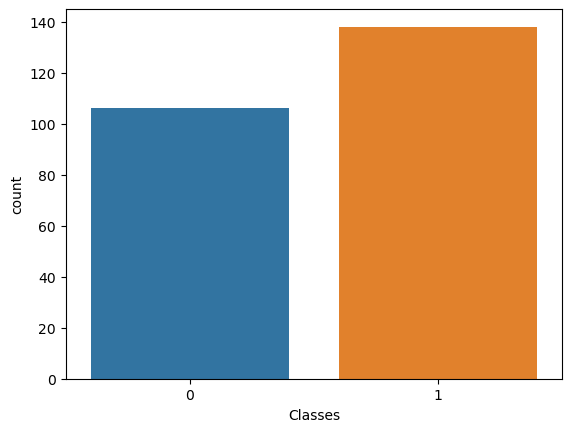

In [29]:
sns.countplot(x='Classes', data=data)

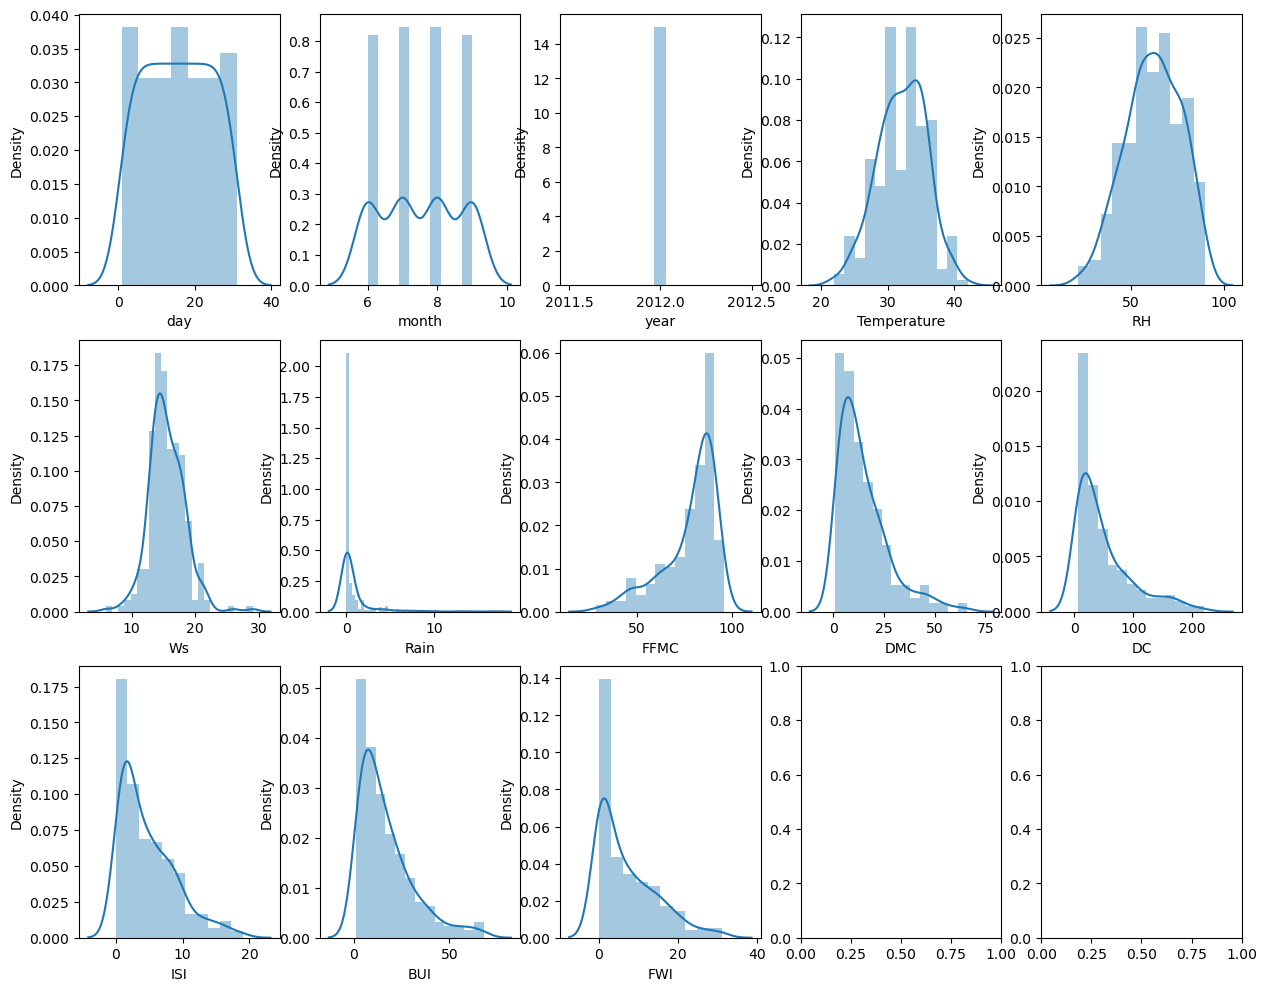

In [30]:
#checking the histograms for each feature


fig, axes = plt.subplots(3,5, figsize=(15,12) )
si1 = [[0,0], [0,1], [0,2], [0,3], [0,4], [1,0], [1,1], [1,2], [1,3], [1,4],  [2,0], [2,1], [2,2]]

for item in range(len(featlist)-2): 
    i = si1[item][0]
    j = si1[item][1]
    sns.distplot(data[featlist[item]], kde = True, ax =axes[i,j])    
    
plt.show() 

## Observations : 

1. Temperature :Range is between 22 and 42.5. Most frequent temperatures are 30 - 35. We need to plot month vs 
    temperature for more insight.
2. Humidity : Range is between 20 and 90. Most frequent values are from 55 to 70. We need to plot month vs 
    humity and temperature vs humidity for more insight. 
3. Wind Speed : Range is between 5 and 30. mean is round 15. Seems a gaussian distribution (not perfect one). 
4. Rain : Rain is very less. LogNormal distribution. 
5. FFMC : Range is from 30 to 95. Count is more for FFMC around 80-90. Need to see a monthwise distribution.
6. DMC : Lognormal distribution. 
7. DC : Lognormal distribution
8. ISI : Lognormal distribution 
9. FWI : Lognormal distrbution
10. BUI : Lognormal distribution

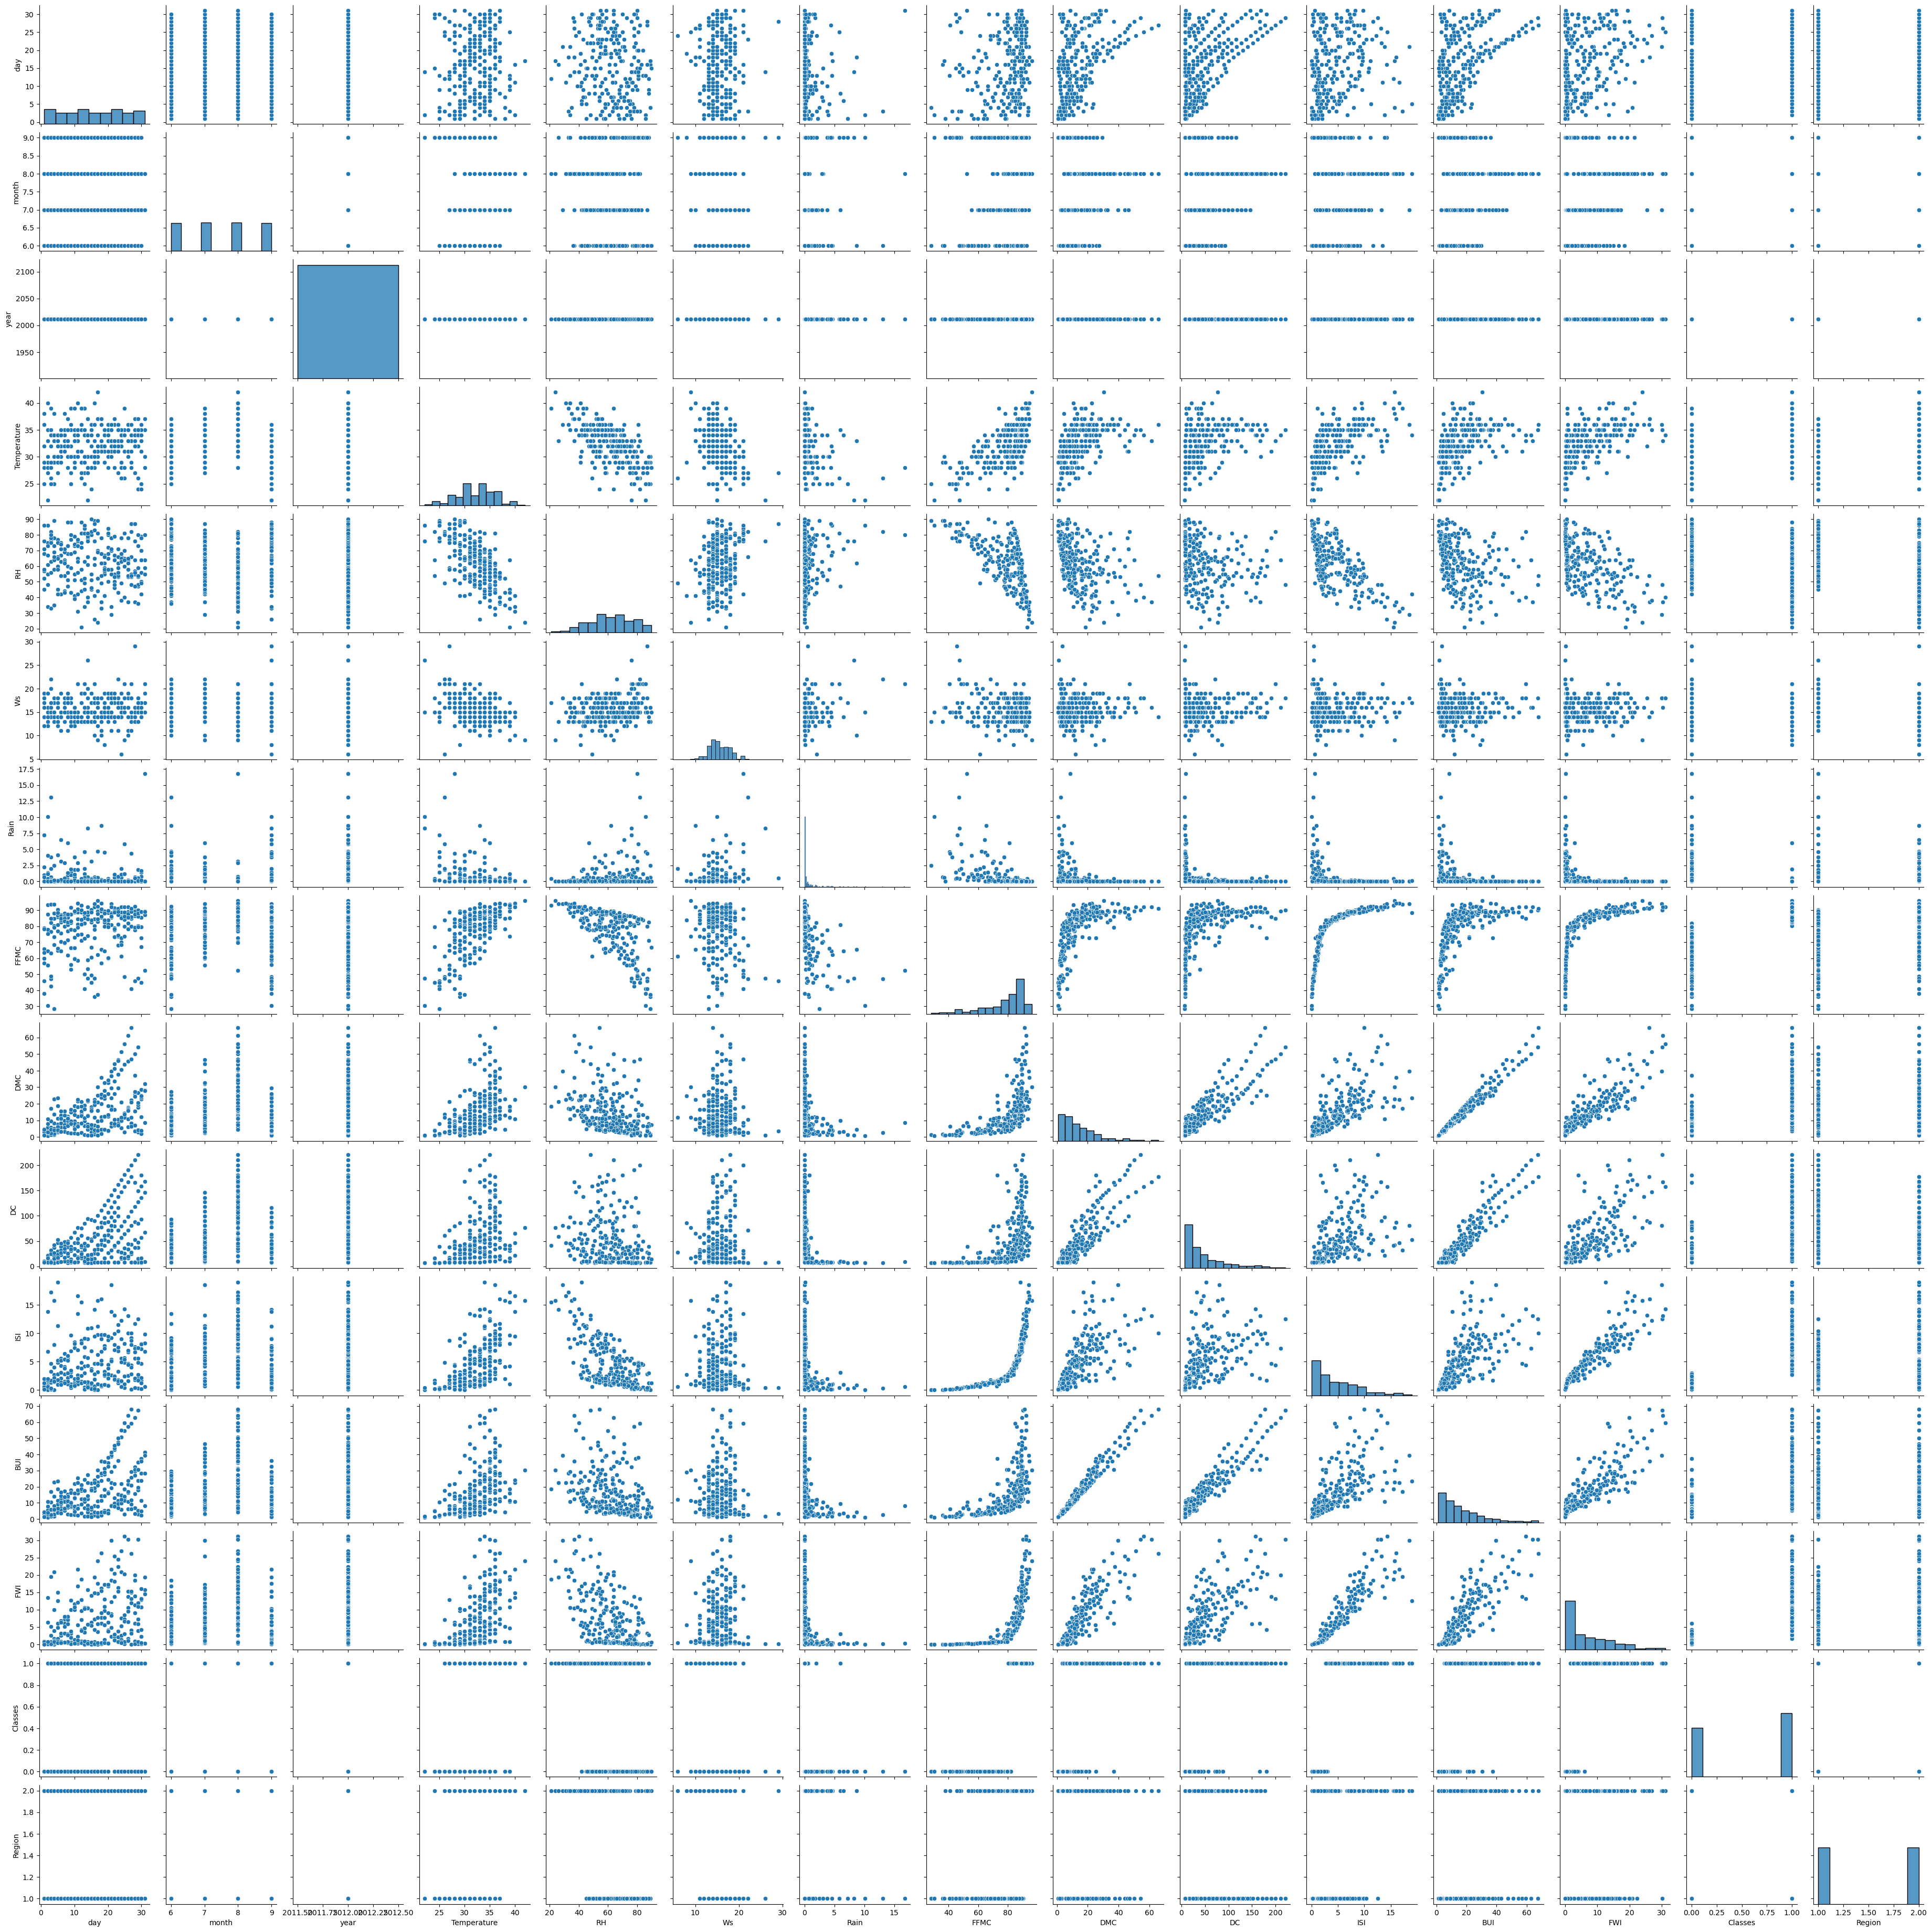

In [31]:
sns.pairplot(df2)

In [32]:
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,0.201784,3.909990e-16
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,0.022333,-2.023760e-16
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,0.518119,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.435023,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.066529,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.379449,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.770114,2.246798e-01
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.584188,1.910937e-01
DC,5.279285e-01,1.276719e-01,NaN,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.507122,-8.148947e-02


<Axes: >

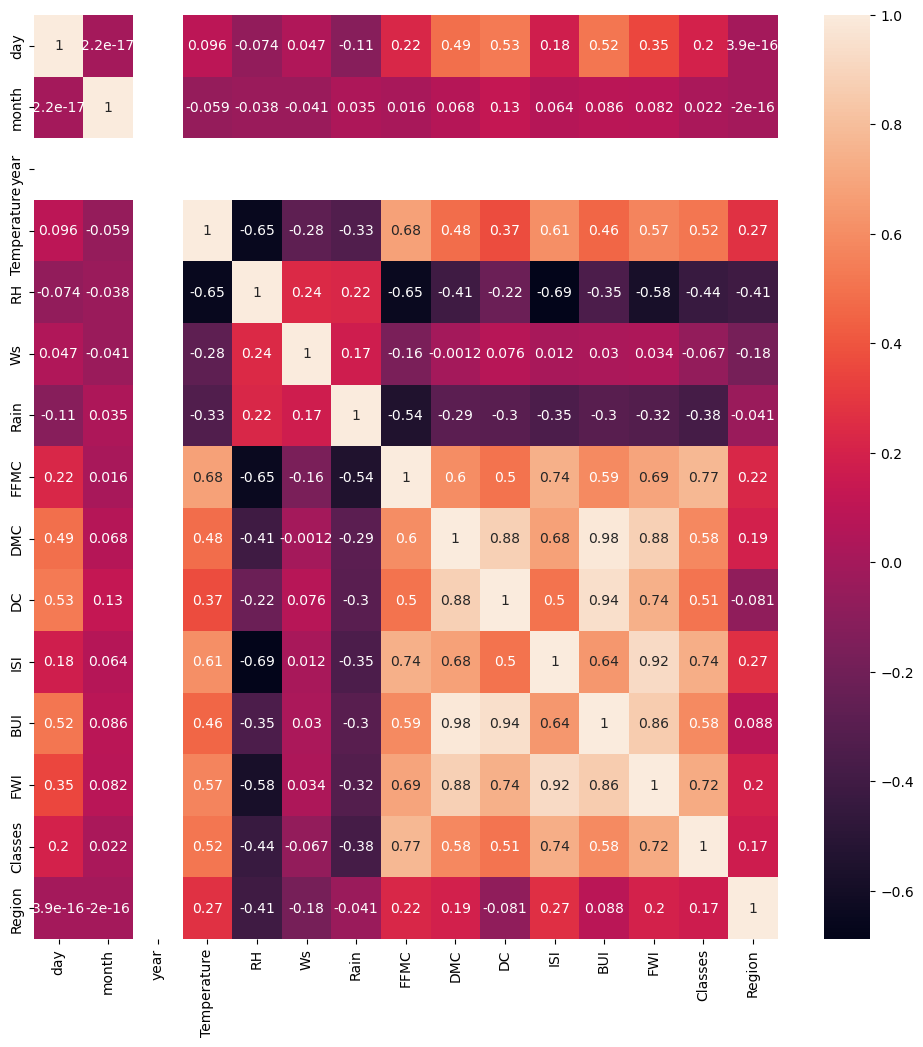

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

## Observation : 
1. The features FFMC, DMC, DC, ISI, BUI and FWI are highly correlated.
2. Only temperature is moderately correlated with these features. 
3. Wind speed is not at all correlated with FFMC, DMC, DC, ISI, BUI and FWI. 
4. Relative humidity and rain are negatively correlated with FFMC, DMC, DC, ISI, BUI and FWI. 

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

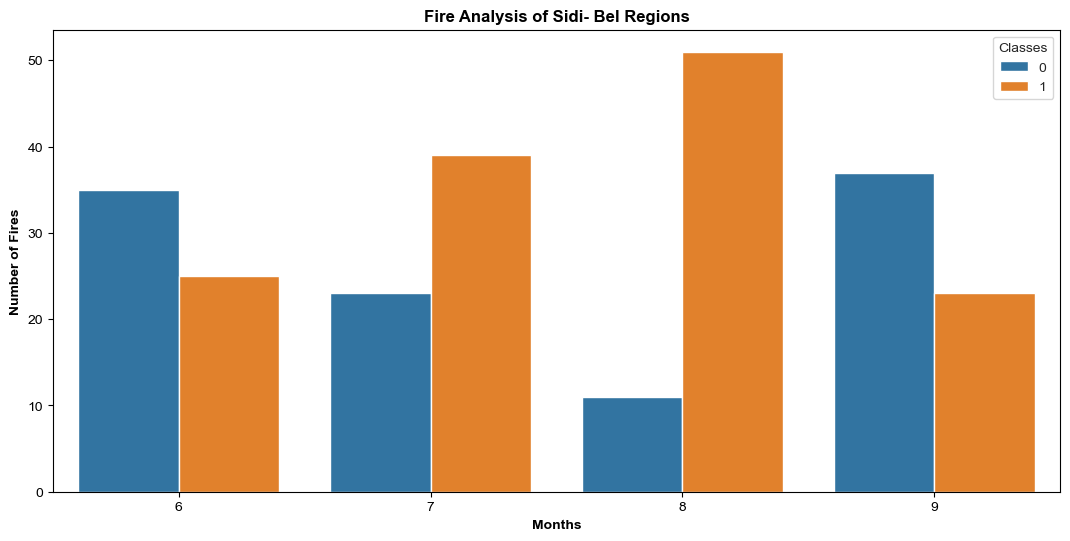

In [34]:
## Monthly Fire Analysis
datatemp=data.loc[data['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=data)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

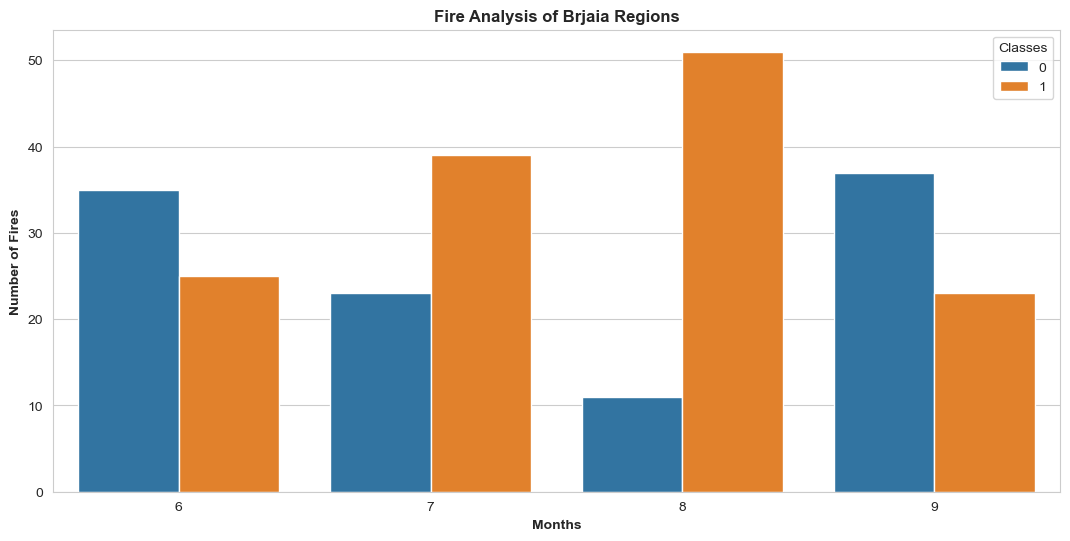

In [35]:
## Monthly Fire Analysis
datatemp=data.loc[data['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=data)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

## Observation : 

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September

In [36]:
data.shape

(244, 15)

In [37]:
data.to_csv('cleaned_data.csv', index=False)